In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
data= pd.read_csv("housing.csv")

In [105]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [106]:
data.info() #to check any null values, this will give count of non null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [107]:
data.dropna()#return data frame with only non null value

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [108]:
data.dropna(inplace=True) #saves the data frame with non null values only

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [110]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis=1) #x is data frame without the target variable, since we are dropping a column we need to mention axis=1
y = data['median_house_value'] #y is just that one column

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) #20% of the data is reserved for evaluationg, go to size of testing is 0.2.

In [112]:
train_data=x_train.join(y_train) #combined data set for training

In [113]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
8272,-118.16,33.77,38.0,3235.0,769.0,1284.0,752.0,2.9384,NEAR OCEAN,304100.0
12965,-121.32,38.70,17.0,3214.0,551.0,1879.0,562.0,4.3643,INLAND,124900.0
15396,-117.08,33.23,14.0,3337.0,571.0,1385.0,512.0,4.1500,<1H OCEAN,272200.0
4674,-118.35,34.07,52.0,2497.0,406.0,1030.0,412.0,4.8900,<1H OCEAN,500001.0
13934,-117.32,34.24,29.0,1290.0,263.0,323.0,113.0,1.9265,INLAND,103300.0
...,...,...,...,...,...,...,...,...,...,...
2919,-119.04,35.37,46.0,1637.0,338.0,714.0,297.0,2.1818,INLAND,75300.0
13590,-117.29,34.11,48.0,1498.0,448.0,1586.0,455.0,1.1687,INLAND,70800.0
9890,-122.29,38.30,52.0,1219.0,288.0,847.0,283.0,1.6691,NEAR BAY,183300.0
3966,-118.57,34.20,36.0,2559.0,469.0,1358.0,445.0,4.5568,<1H OCEAN,201500.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

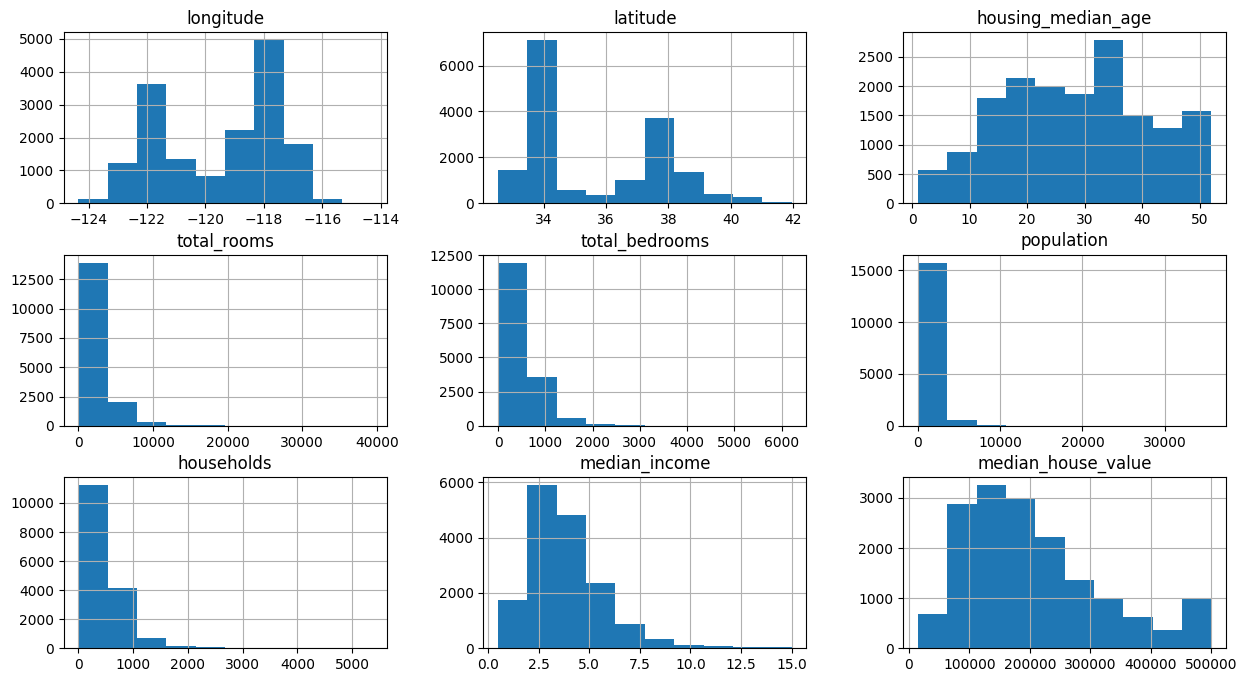

In [114]:
train_data.hist(figsize=(15,8)) #to get histograms of individual features, fig sze is to set the width and height of figures

In [115]:
train_data1 = train_data.select_dtypes(include=[np.number]) #to remove non numeric values from the columns


<Axes: >

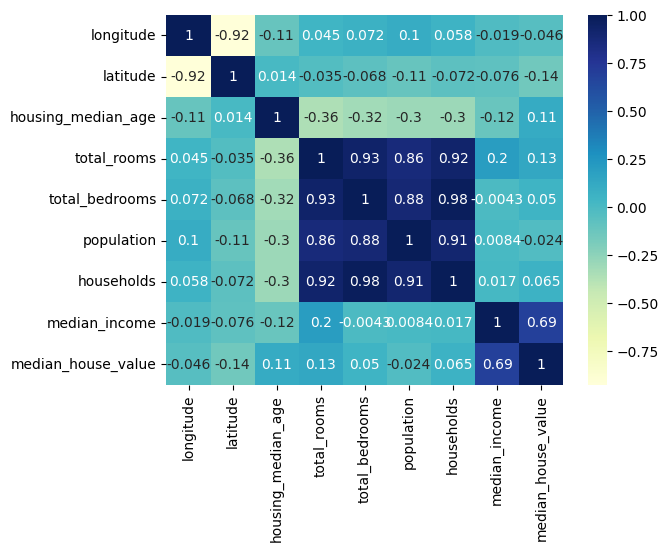

In [116]:
sns.heatmap(train_data1.corr(), annot=True, cmap="YlGnBu") #heatmap of correlations

In [117]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1) #taking log values adding 1 
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

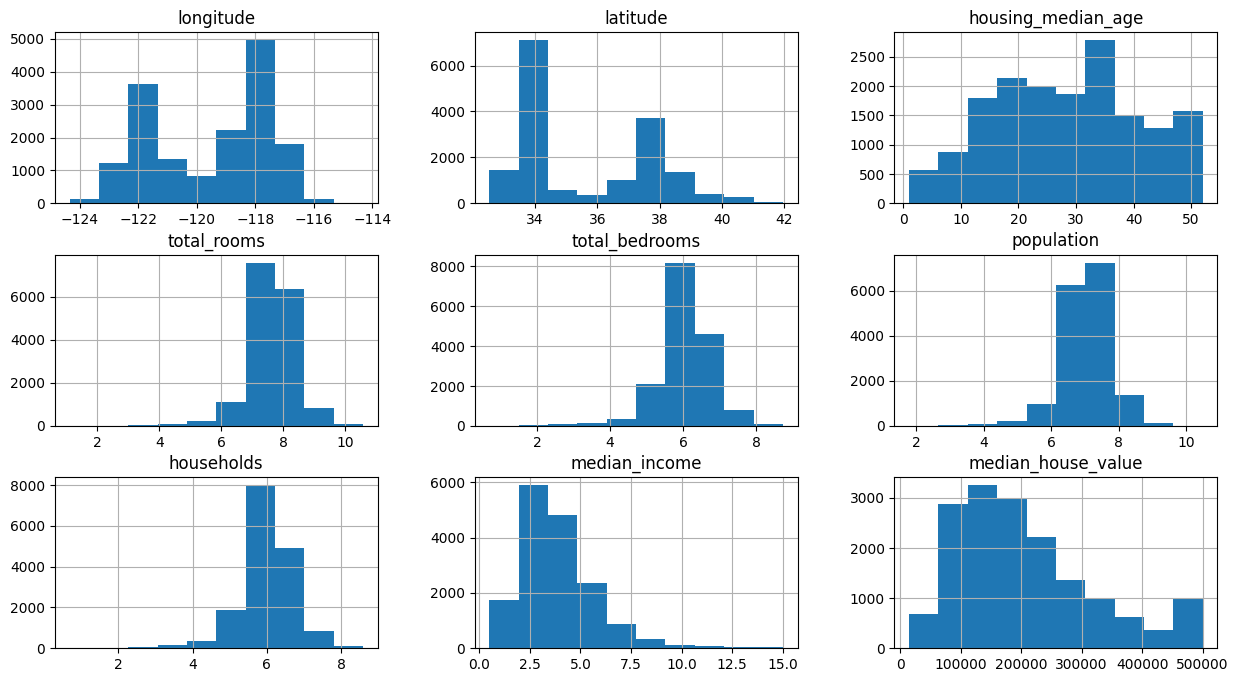

In [118]:
train_data.hist(figsize=(15,8))

In [119]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7183
INLAND        5212
NEAR OCEAN    2130
NEAR BAY      1816
ISLAND           5
Name: count, dtype: int64

In [120]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [124]:
uniq_labels_ocean_proximity = train_data.ocean_proximity.unique()

In [125]:
uniq_labels_ocean_proximity

array(['NEAR OCEAN', 'INLAND', '<1H OCEAN', 'NEAR BAY', 'ISLAND'],
      dtype=object)

In [126]:
le.fit(uniq_labels_ocean_proximity)

LabelEncoder()

In [129]:
train_data['ocean_proximity'] = le.transform(train_data['ocean_proximity'])

In [130]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
8272,-118.16,33.77,38.0,8.082093,6.646391,7.158514,6.624065,2.9384,4,304100.0
12965,-121.32,38.70,17.0,8.075583,6.313548,7.539027,6.333280,4.3643,1,124900.0
15396,-117.08,33.23,14.0,8.113127,6.349139,7.234177,6.240276,4.1500,0,272200.0
4674,-118.35,34.07,52.0,7.823246,6.008813,6.938284,6.023448,4.8900,0,500001.0
13934,-117.32,34.24,29.0,7.163172,5.575949,5.780744,4.736198,1.9265,1,103300.0
...,...,...,...,...,...,...,...,...,...,...
2919,-119.04,35.37,46.0,7.401231,5.826000,6.572283,5.697093,2.1818,1,75300.0
13590,-117.29,34.11,48.0,7.312553,6.107023,7.369601,6.122493,1.1687,1,70800.0
9890,-122.29,38.30,52.0,7.106606,5.666427,6.742881,5.648974,1.6691,3,183300.0
3966,-118.57,34.20,36.0,7.847763,6.152733,7.214504,6.100319,4.5568,0,201500.0


In [131]:
train_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

<Axes: xlabel='latitude', ylabel='longitude'>

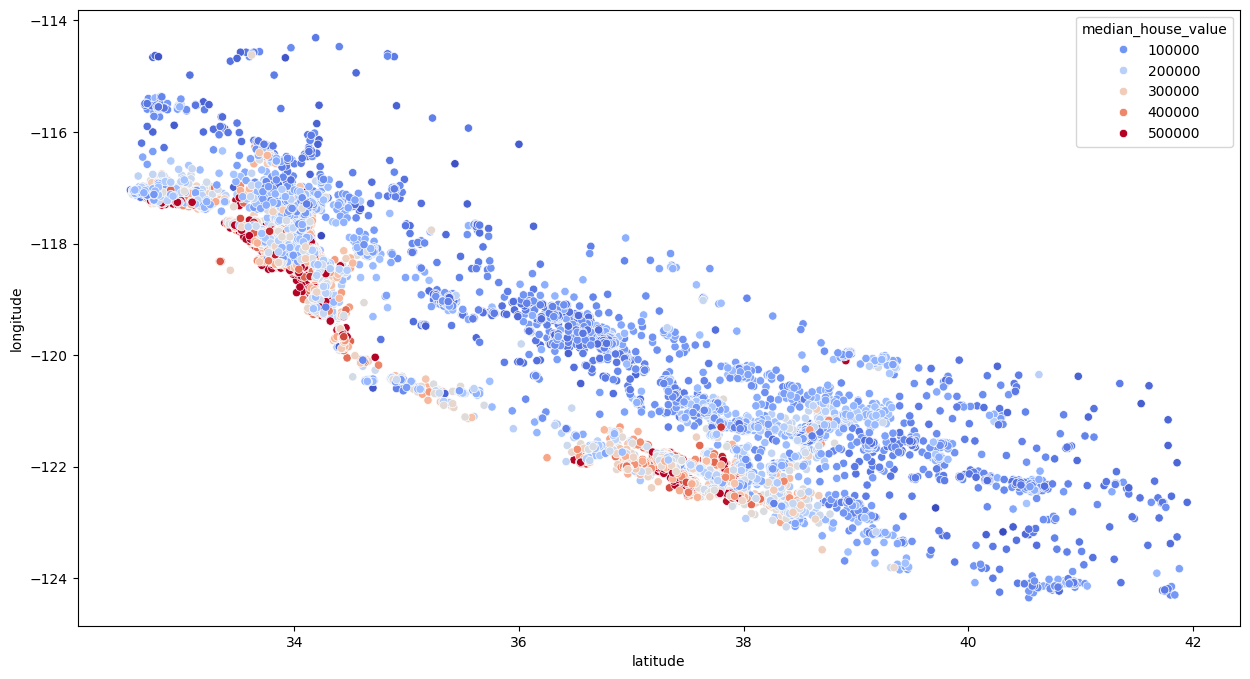

In [132]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm") #plotting median house against longitude and latitude

<Axes: >

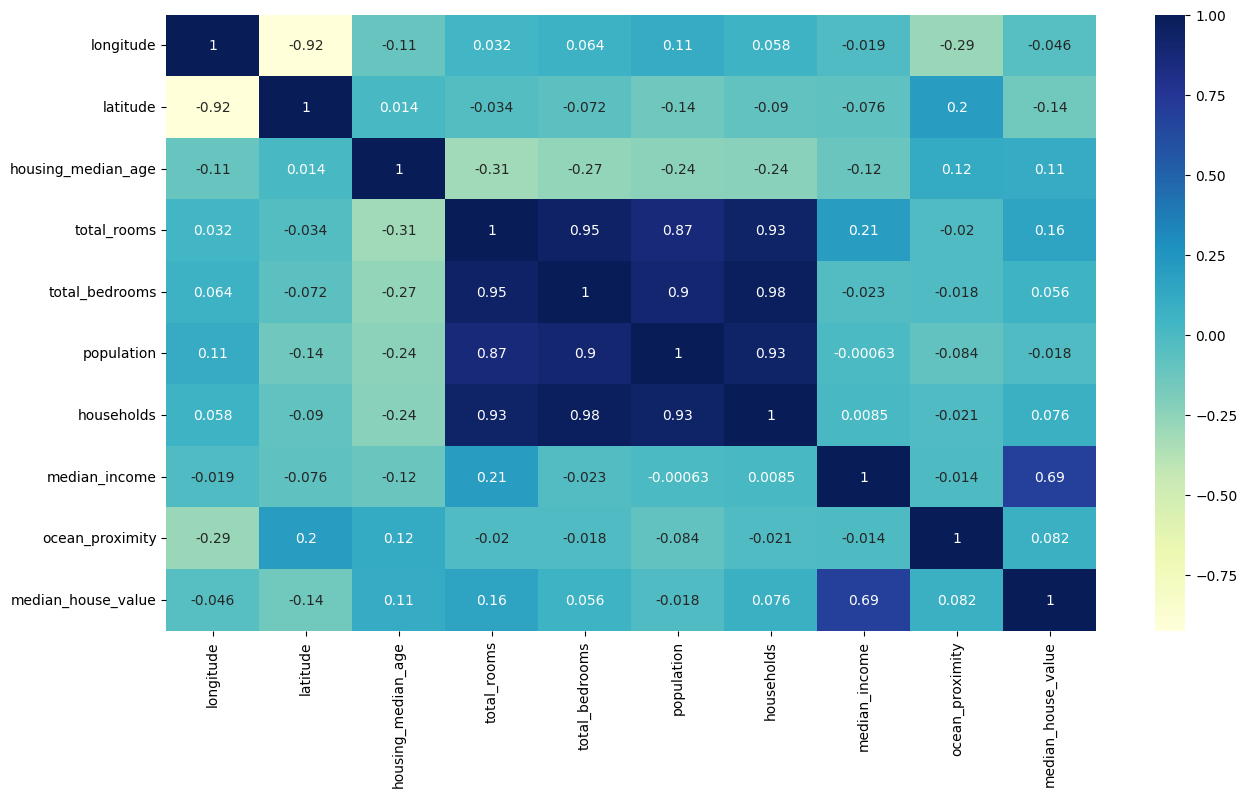

In [133]:
plt.figure(figsize=(15, 8))#defining size
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


In [134]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms'] #No. of bedrooms to total no. of rooms
train_data['household_rooms']=train_data['total_rooms']/train_data['households'] #No. of rooms per household

<Axes: >

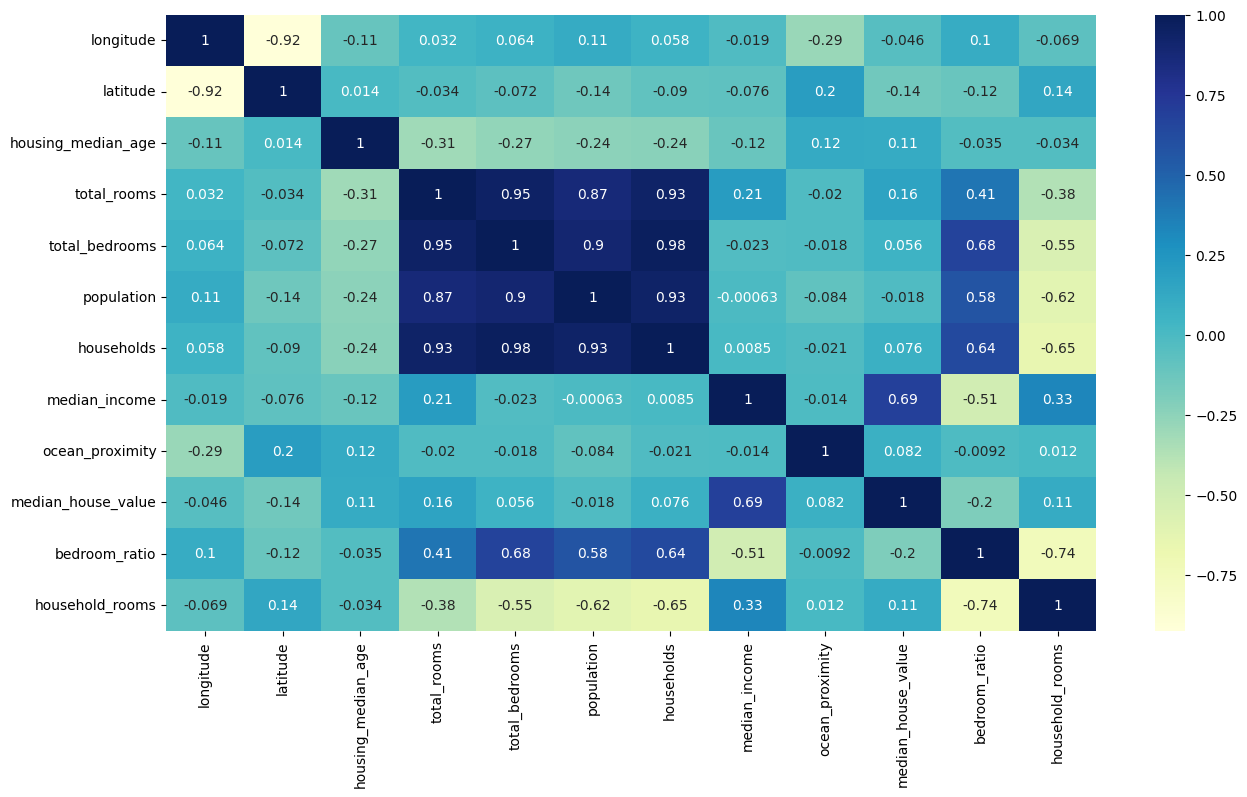

In [135]:
plt.figure(figsize=(15, 8))#defining size
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train, y_train = train_data.drop(['median_house_value'],axis=1),train_data['median_house_value'] #splitting the training data in x and y axis
# x_train_s, = scaler.fit_transform(x_train)

reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [139]:
test_data = x_test.join(y_test)

test_data['total_rooms'] =np.log(test_data['total_rooms']+1) #taking log values adding 1 
test_data['total_bedrooms'] =np.log(test_data['total_bedrooms']+1)
test_data['population'] =np.log(test_data['population']+1)
test_data['households'] =np.log(test_data['households']+1)

In [140]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
2251,-119.81,36.80,38.0,7.720018,5.786897,6.656727,5.752573,6.1575,INLAND,160100.0
7091,-118.01,33.92,35.0,7.382124,5.669881,6.721426,5.613128,5.2730,<1H OCEAN,187600.0
15358,-117.33,33.23,15.0,7.552762,6.033086,7.138073,5.963579,3.3300,NEAR OCEAN,127900.0
13328,-117.66,34.05,6.0,8.542861,7.021084,7.837554,6.856462,3.6250,INLAND,113600.0
12947,-121.28,38.64,24.0,8.149024,6.352629,7.198184,6.300786,4.8661,INLAND,186200.0
...,...,...,...,...,...,...,...,...,...,...
7176,-118.18,34.05,38.0,8.093462,6.595781,8.101678,6.588926,2.8295,<1H OCEAN,126500.0
10479,-117.69,33.60,12.0,8.089176,6.045005,7.289611,6.077642,6.5413,<1H OCEAN,332000.0
1077,-121.79,39.73,8.0,8.646641,7.081709,7.968320,6.982863,3.0625,INLAND,116300.0
2326,-119.71,36.81,19.0,7.733246,6.311735,6.942157,6.216606,1.6618,INLAND,69700.0


In [141]:
test_data['ocean_proximity'] = le.transform(test_data['ocean_proximity'])

In [143]:
test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms'] #No. of bedrooms to total no. of rooms
test_data['household_rooms']=test_data['total_rooms']/test_data['households']

In [144]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,bedroom_ratio,household_rooms
2251,-119.81,36.80,38.0,7.720018,5.786897,6.656727,5.752573,6.1575,1,160100.0,0.749596,1.342011
7091,-118.01,33.92,35.0,7.382124,5.669881,6.721426,5.613128,5.2730,0,187600.0,0.768055,1.315153
15358,-117.33,33.23,15.0,7.552762,6.033086,7.138073,5.963579,3.3300,4,127900.0,0.798792,1.266481
13328,-117.66,34.05,6.0,8.542861,7.021084,7.837554,6.856462,3.6250,1,113600.0,0.821866,1.245958
12947,-121.28,38.64,24.0,8.149024,6.352629,7.198184,6.300786,4.8661,1,186200.0,0.779557,1.293335
...,...,...,...,...,...,...,...,...,...,...,...,...
7176,-118.18,34.05,38.0,8.093462,6.595781,8.101678,6.588926,2.8295,0,126500.0,0.814952,1.228343
10479,-117.69,33.60,12.0,8.089176,6.045005,7.289611,6.077642,6.5413,0,332000.0,0.747296,1.330973
1077,-121.79,39.73,8.0,8.646641,7.081709,7.968320,6.982863,3.0625,1,116300.0,0.819013,1.238266
2326,-119.71,36.81,19.0,7.733246,6.311735,6.942157,6.216606,1.6618,1,69700.0,0.816182,1.243966


In [145]:
test_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value', 'bedroom_ratio',
       'household_rooms'],
      dtype='object')

In [146]:
x_test, y_test = test_data.drop(['median_house_value'],axis=1),test_data['median_house_value'] #splitting the training data in x and y axis

In [160]:
reg.score(x_test,y_test) #calculates the R-squared score. The R-squared (coefficient of determination) is a statistical measure that represents the proportion of the variance in the dependent variable that is explained by the independent variables in a regression model.

0.6652058051385794

In [161]:
from sklearn.ensemble import RandomForestRegressor # Importing Random Forest Regressor

forest = RandomForestRegressor() #Instantiation of Baseline model

forest.fit(x_train, y_train) # Training model

RandomForestRegressor()

In [162]:
forest.score(x_train, y_train) # Evaluating the model fit

0.9742213768121644

In [ ]:
from sklearn.model_selection import GridSearchCV # Automating Hyperparameter Tuning

forest = RandomForestRegressor()

# Hyperparameters
param_grid = {
    "n_estimators":[3,10,30],
    "max_features":[2,4,6,8]
}

# Performing Cross Validation
grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

# Training the model
grid_search.fit(x_train, y_train)

In [ ]:
best_forest = grid_search.best_estimator_ #determining the best hyperparameters using the attribute - .best_estimator_

In [ ]:
grid_search.best_estimator_

In [ ]:
best_forest.score(x_test,y_test) #Evaluating the model